In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x16d53de6490>)

In [4]:
pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [308]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
pip install plotly matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [311]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

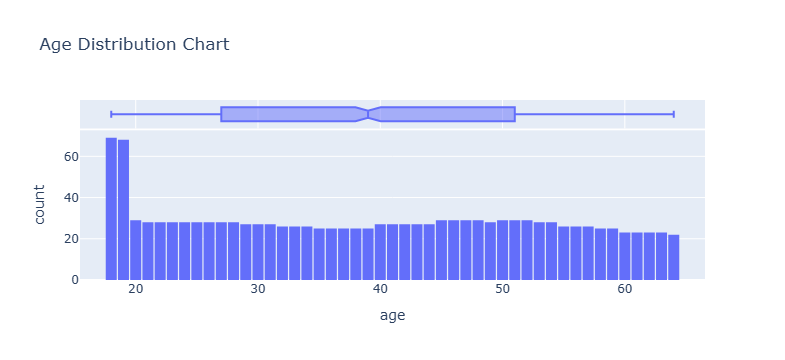

In [204]:
fig = px.histogram(medical_df, x = 'age', marginal = 'box', nbins = 47, title = 'Age Distribution Chart')
fig.update_layout(bargap = 0.1)
fig.show()

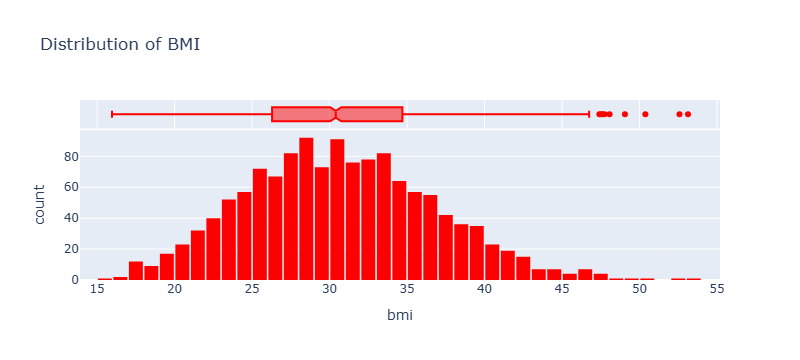

In [205]:
fig = px.histogram(medical_df, x = 'bmi', marginal = 'box', color_discrete_sequence = ["red"], title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

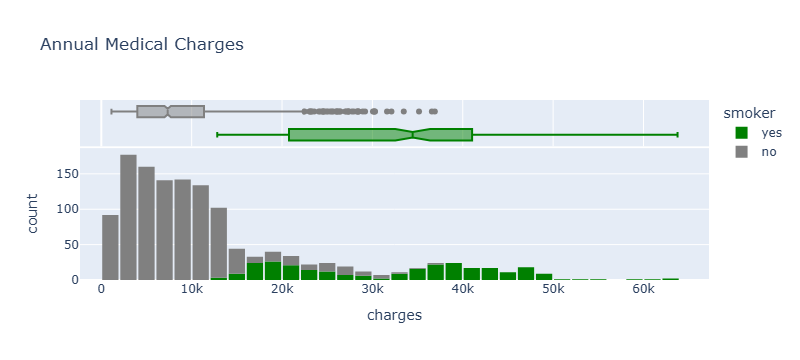

In [206]:
fig = px.histogram(medical_df, x = "charges", marginal = "box", color = "smoker", color_discrete_sequence = ["green","grey"], title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [9]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

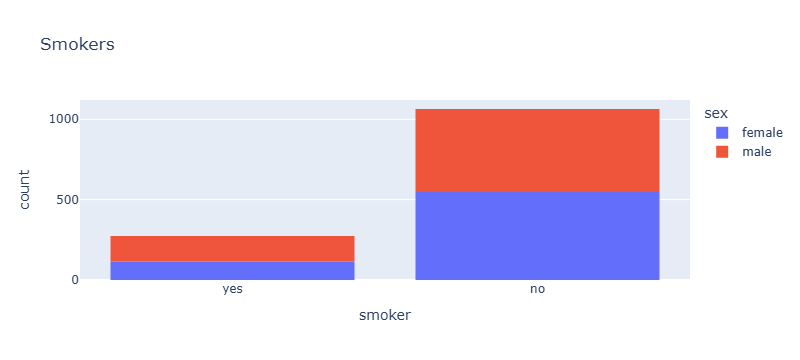

In [208]:
px.histogram(medical_df, x= "smoker", color = "sex", title = "Smokers")

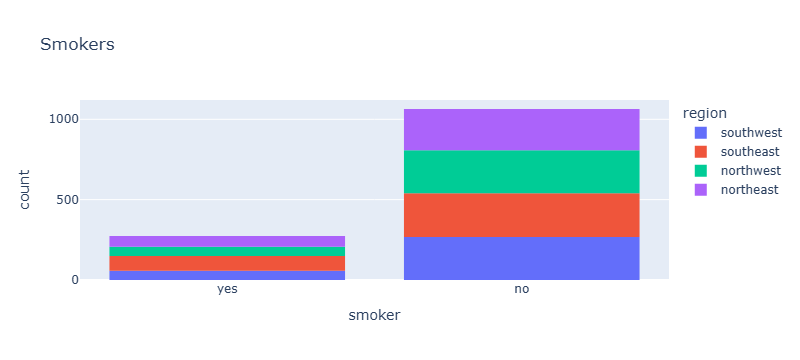

In [209]:
px.histogram(medical_df, x= "smoker", color = "region", title = "Smokers")

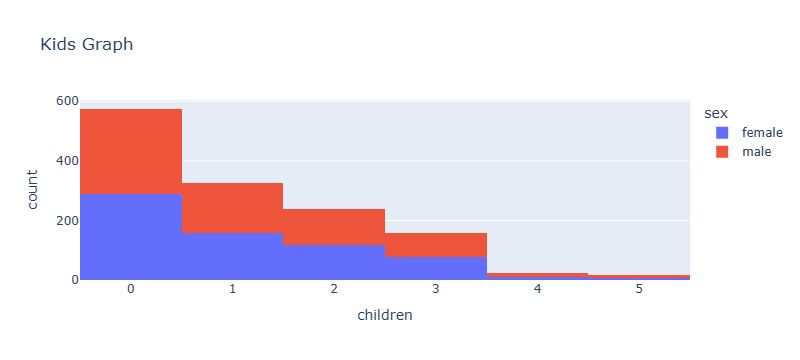

In [210]:
px.histogram(medical_df, x= "children", color = "sex", title = "Kids Graph")

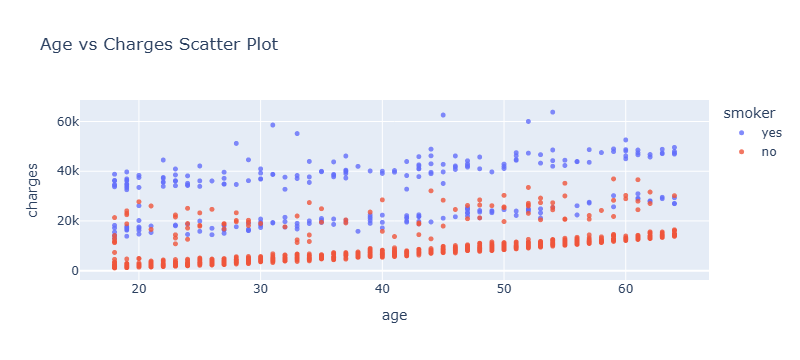

In [211]:
fig = px.scatter(medical_df, x = "age", y = "charges", color = "smoker", opacity = 0.8, hover_data = ["sex"], title = "Age vs Charges Scatter Plot")
fig.update_traces(marker_size = 5)
fig.show()

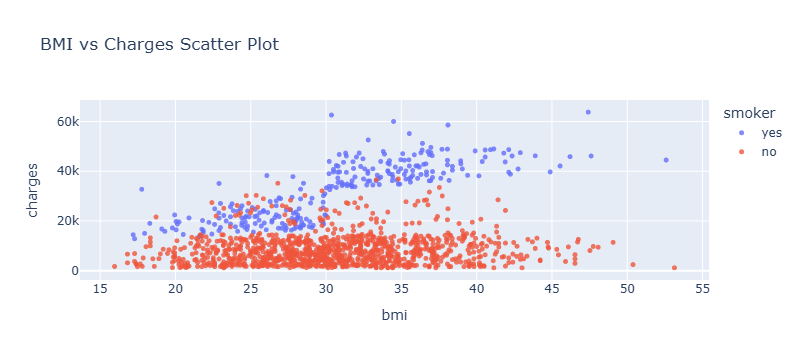

In [212]:
fig = px.scatter(medical_df, x = "bmi", y = "charges", color = "smoker", opacity = 0.8, hover_data = ["sex"], title = "BMI vs Charges Scatter Plot")
fig.update_traces(marker_size = 5)
fig.show()

In [10]:
print(medical_df.charges.corr(medical_df.age))

0.2990081933306478


In [11]:
print(medical_df.charges.corr(medical_df.bmi))

0.19834096883362887


In [12]:
smoker_values = {"yes": 1, "no": 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [13]:
print(medical_df.charges.corr(smoker_numeric))

0.7872514304984778


In [14]:
sex_values = {"male": 1, "female": 0}
sex_numeric = medical_df.sex.map(sex_values)
sex_numeric

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [15]:
print(medical_df.charges.corr(sex_numeric))

0.05729206220202533


In [319]:
medical_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [321]:
medical_df.select_dtypes(include = "number").corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


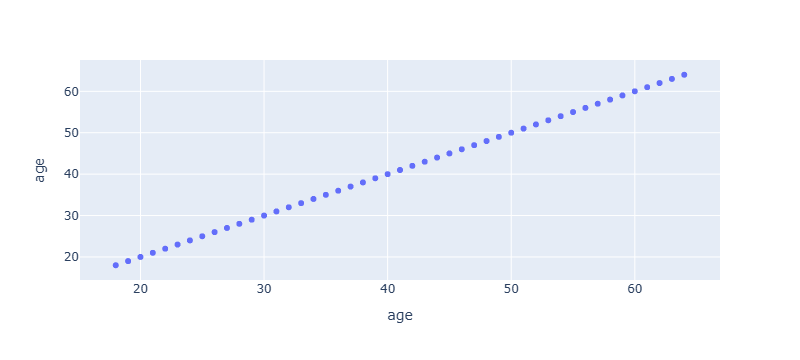

In [322]:
px.scatter(medical_df, x = "age", y = "age")

Text(0.5, 1.0, 'Correlation Matrix')

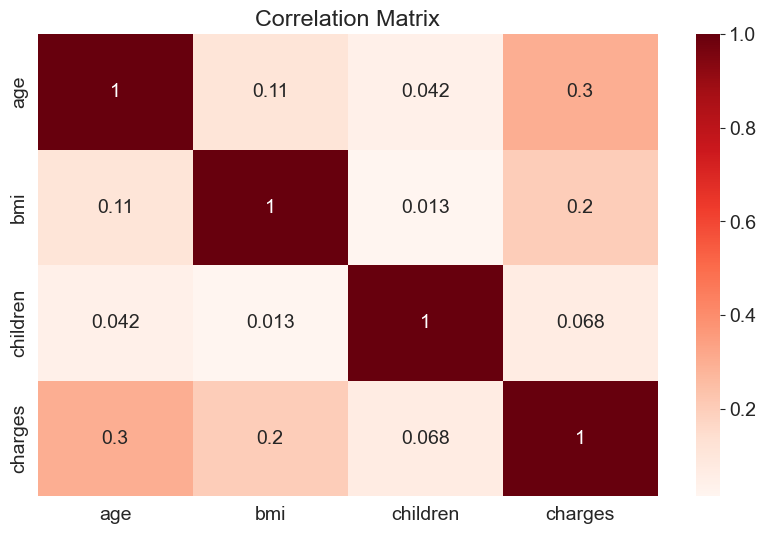

In [222]:
sns.heatmap(medical_df.select_dtypes(include = "number").corr(), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")

In [16]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

Text(0.5, 1.0, 'Ages vs Charges')

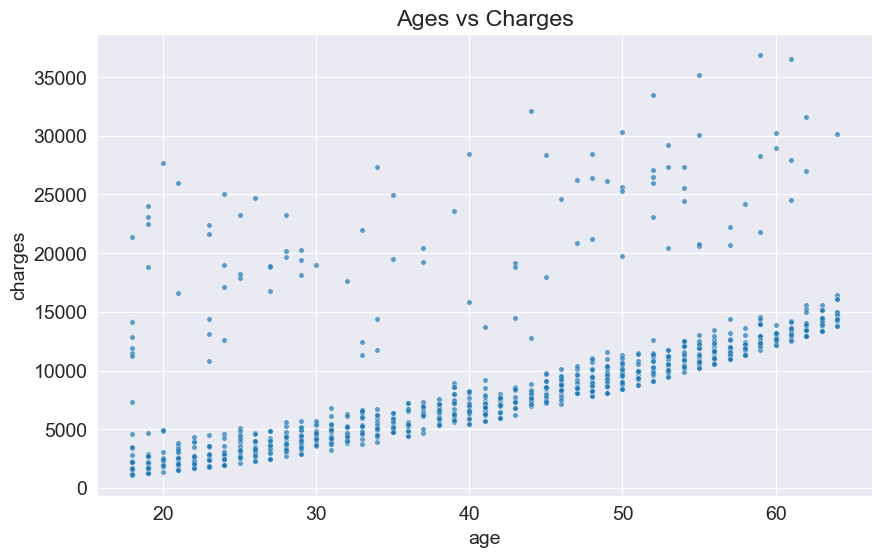

In [17]:
sns.scatterplot(non_smoker_df, x = "age", y = "charges", alpha = 0.7, s = 15)
plt.title("Ages vs Charges")

Model
charges = age * w + b
w = weight
b = bias

In [18]:
def estimate_charges(age, w, b):
    return (age * w) + b

In [19]:
w = 50
b = 100
estimate_charges(40, w, b)

2100

In [20]:
age = non_smoker_df.age
age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [21]:
estimated_charges = estimate_charges(age, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [22]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

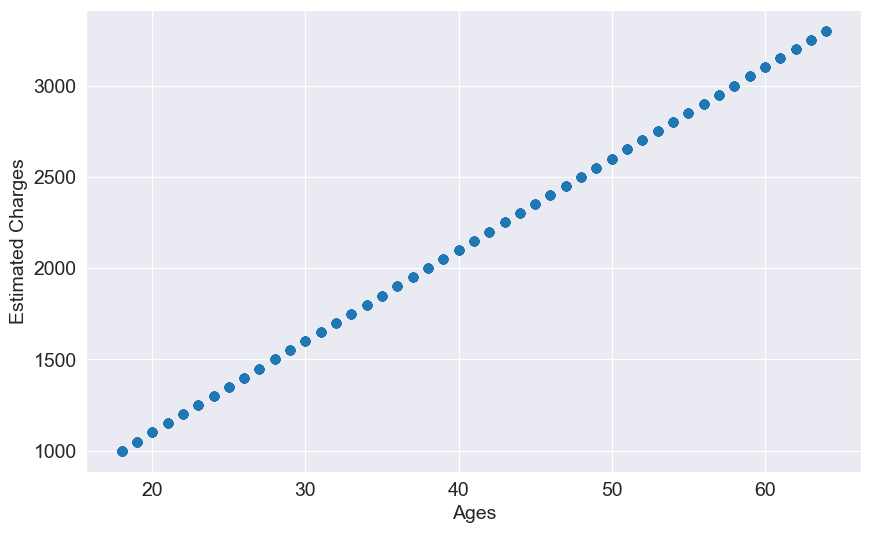

In [230]:
plt.scatter(age, estimated_charges)
plt.xlabel("Ages")
plt.ylabel("Estimated Charges")

Text(0, 0.5, 'Estimated Charges')

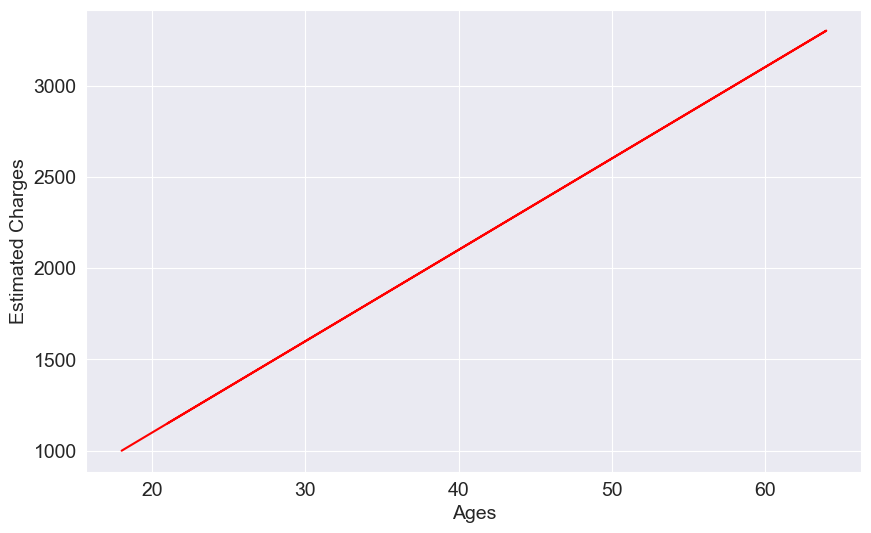

In [231]:
plt.plot(age, estimated_charges, "r-")
plt.xlabel("Ages")
plt.ylabel("Estimated Charges")

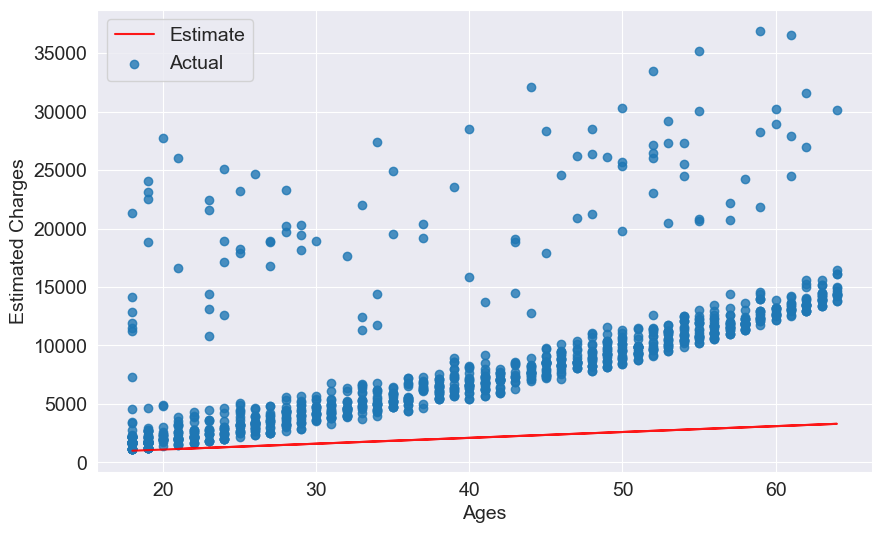

In [330]:
target = non_smoker_df.charges

plt.plot(age, estimated_charges, "r", alpha = 0.9)

plt.scatter(age, target, alpha = 0.8)
plt.xlabel("Ages")
plt.ylabel("Estimated Charges")

plt.legend(["Estimate", "Actual"])

In [23]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(age, w, b)
    
    plt.plot(age, estimated_charges, "r", alpha = 0.9)
    plt.scatter(age, target, s = 8, alpha = 0.8)
    plt.xlabel("Ages")
    plt.ylabel("Estimated Charges")
    
    plt.legend(["Estimate", "Actual"])

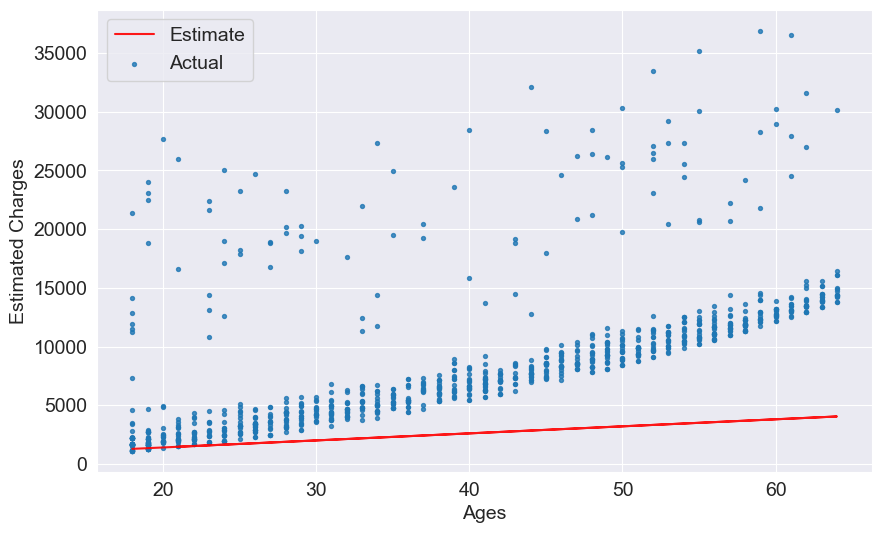

In [24]:
try_parameters(60, 200)

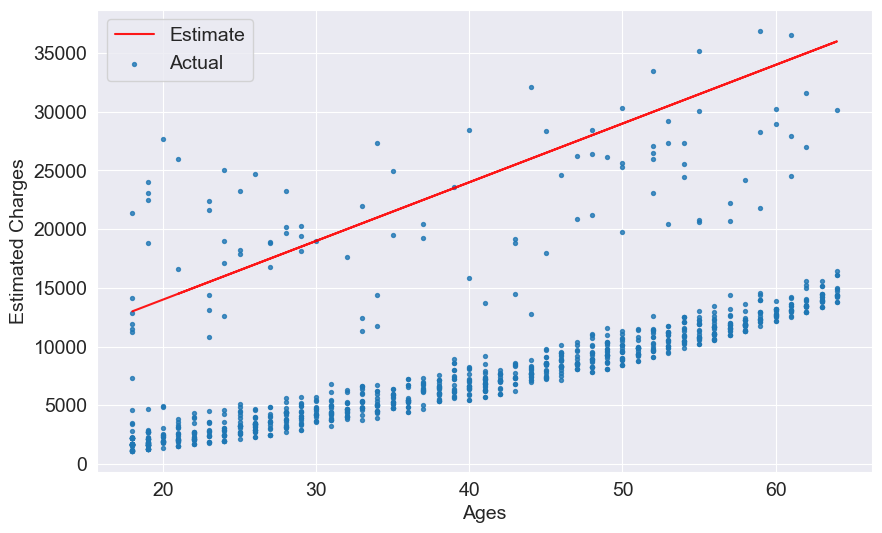

In [333]:
try_parameters(500, 4000)

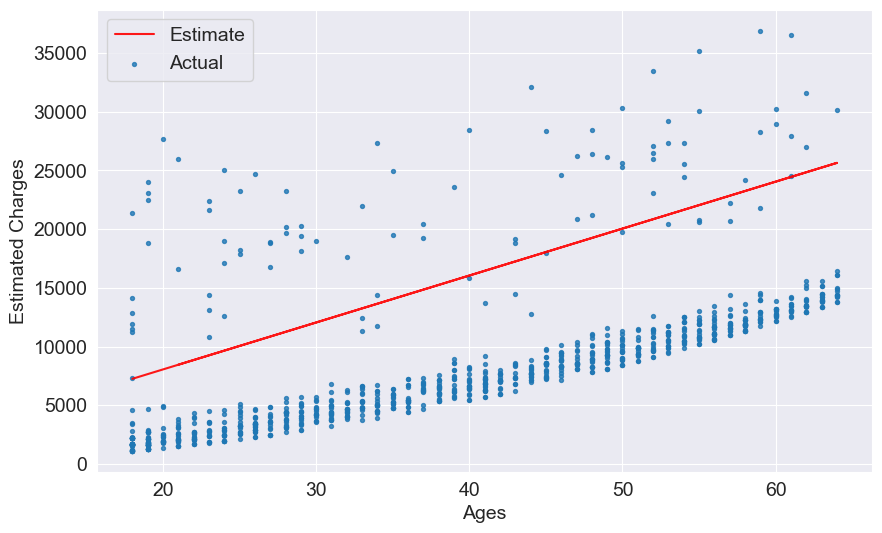

In [48]:
try_parameters(400, 50)

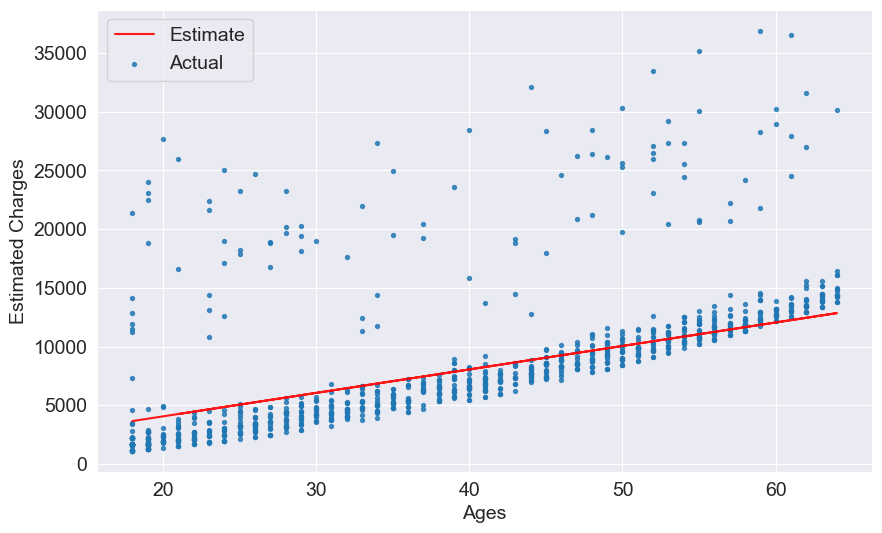

In [235]:
try_parameters(200, 50)

LaTeX: a^2

In [25]:
target = non_smoker_df.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [26]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Root Mean Square Error (RMSE)

In [55]:
pip install numpy --quiet

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np

In [28]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

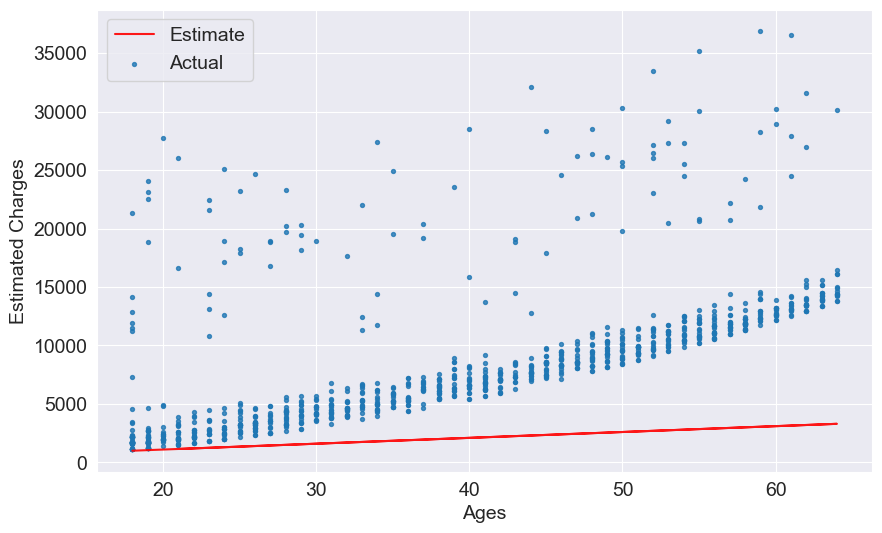

In [29]:
w = 50
b = 100
try_parameters(w, b)

In [30]:
target = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(target, predicted)

np.float64(8461.949562575493)

In [31]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    predictions = estimate_charges(age, w, b)
    
    plt.plot(ages, predictions, "r", alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Ages")
    plt.ylabel("Estimated Charges")
    plt.legend(["Predicted", "Actual"])

    loss = rmse(target, predictions)
    print(f"RMSE Loss: {loss}")

RMSE Loss: 8461.949562575493


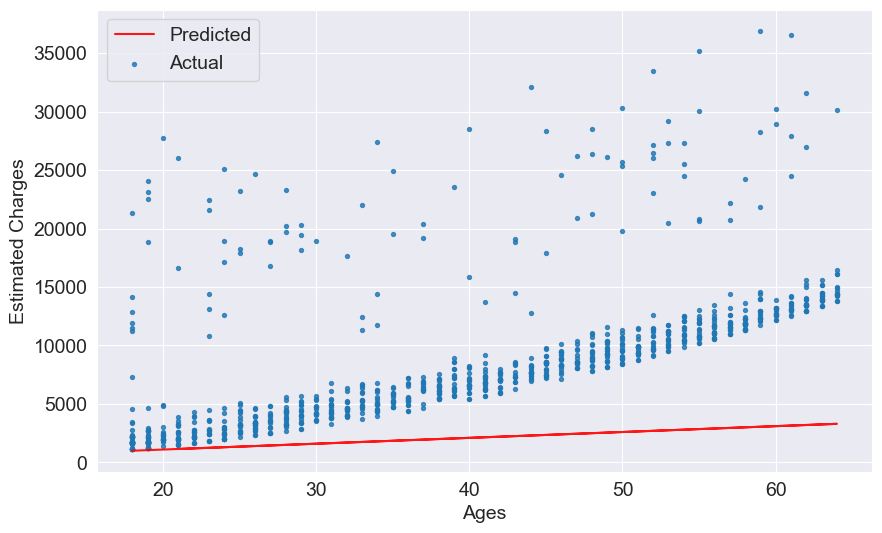

In [32]:
try_parameters(50, 100)

RMSE Loss: 4725.9133994520325


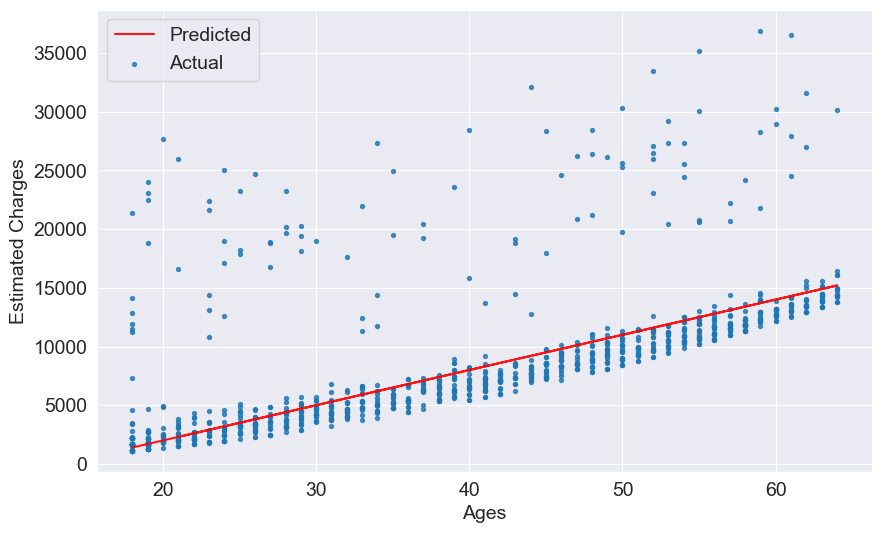

In [342]:
try_parameters(300, -4000)

In [81]:
pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [36]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df.charges
print(f"inputs.shape: {inputs.shape}")
print(f"targets.shape: {targets.shape}")

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [37]:
type(inputs)

pandas.core.frame.DataFrame

In [38]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\JFADIPE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [40]:
predictions= model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [41]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
print(rmse(targets, predictions))

4662.505766636395


In [43]:
#w
model.coef_

array([267.24891283])

In [44]:
#b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss: 4662.505766636395


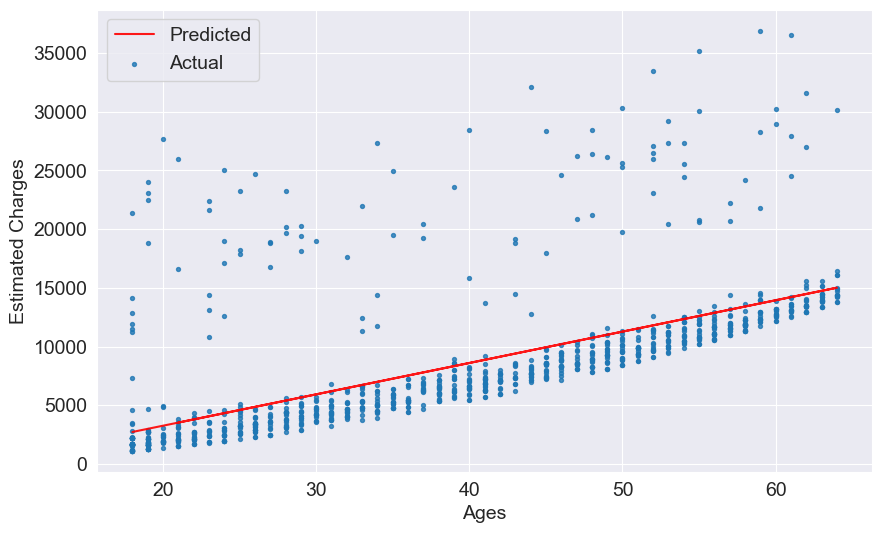

In [45]:
try_parameters(model.coef_, model.intercept_)

In [46]:
from sklearn.linear_model import SGDRegressor

In [47]:
model_2 = SGDRegressor()

In [48]:
help(model_2.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.

    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.

    y : ndarray of shape (n_samples,)
        Target values.

    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.

    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.

    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).

    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [49]:
model_2.fit(inputs, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [50]:
predictions = model_2.predict(inputs)
predictions

array([3257.87187205, 5304.58891143, 6327.94743111, ..., 3257.87187205,
       3257.87187205, 3871.88698386], shape=(1064,))

In [51]:
print(rmse(targets, predictions))

4811.860076839079


In [52]:
model_2.coef_

array([204.67170394])

In [53]:
model_2.intercept_

array([-426.21879882])

RMSE Loss: 4811.860076839079


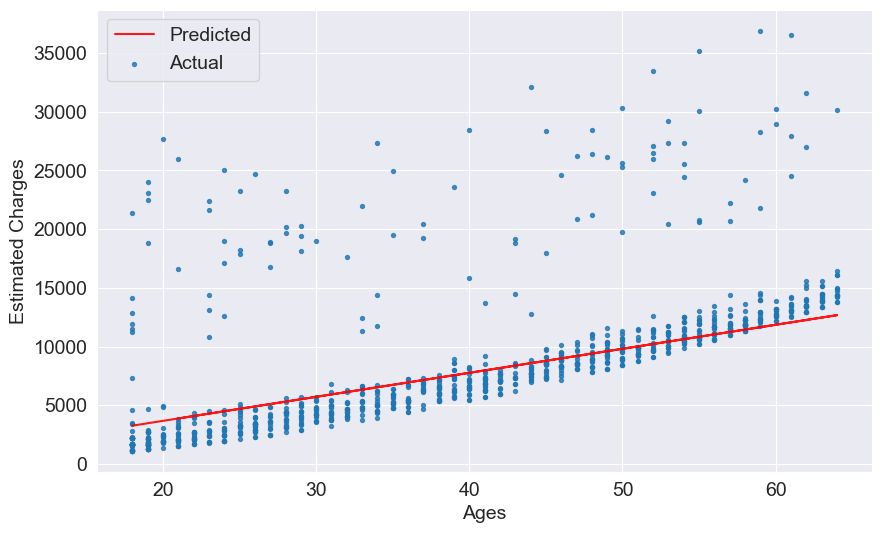

In [54]:
try_parameters(model_2.coef_, model_2.intercept_)



Smokers_Model

In [55]:
smoker_df = medical_df[medical_df.smoker == "yes"]

In [56]:
def estimate_charges(age, w, b):
    return (age * w) + b

In [57]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [58]:
age = non_smoker_df.age
age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [59]:
def try_parameters(w, b):
    ages = smoker_df["age"]
    target = smoker_df.charges

    prediction = estimate_charges(age, w, b)
    
    plt.plot(ages, prediction, "r", alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Ages")
    plt.ylabel("Estimated Charges")
    plt.legend(["Predicted", "Actual"])

    loss = rmse(target, predictions)
    print(f"RMSE Loss: {loss}")

In [60]:
model = LinearRegression()

In [61]:
inputs = smoker_df[["age"]]
targets = smoker_df.charges

In [62]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
predictions = model.predict(inputs)
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757], shape=(1338,))

In [64]:
model.coef_

array([305.23760211])

In [65]:
model.intercept_

np.float64(20294.12812691597)

ValueError: x and y must have same first dimension, but have shapes (274,) and (1064,)

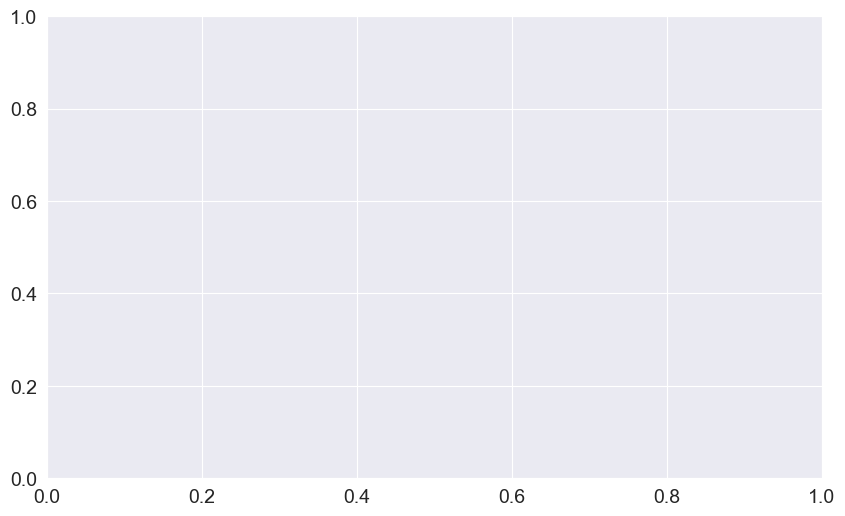

In [66]:
try_parameters(model.coef_, model.intercept_)

In [177]:
from sklearn.linear_model import SGDRegressor
model_2 = SGDRegressor()

In [178]:
model_2.fit(inputs, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


ValueError: x and y must have same first dimension, but have shapes (274,) and (1064,)

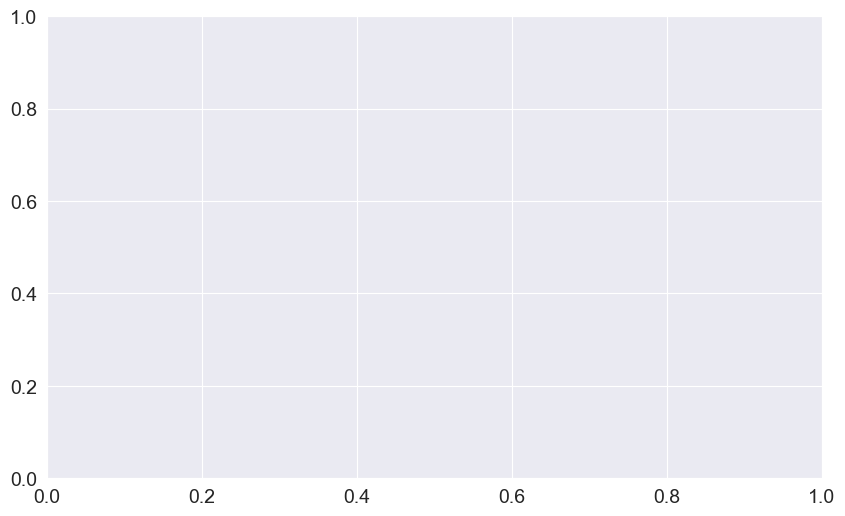

In [179]:
try_parameters(model_2.coef_, model_2.intercept_)

Linear Regression with Multiple Features

y = W1X1 + W2X2 + b

charges = W1 * age + W2 * bmi + b

In [67]:
age = non_smoker_df.age
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"]
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)
loss = rmse(targets, prediction)
print(f"Loss: {loss}")

Loss: 4662.3128354612945


In [68]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [69]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [70]:
fig = px.scatter(non_smoker_df, x = "bmi", y = "charges", title = "BMI vs. Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [388]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

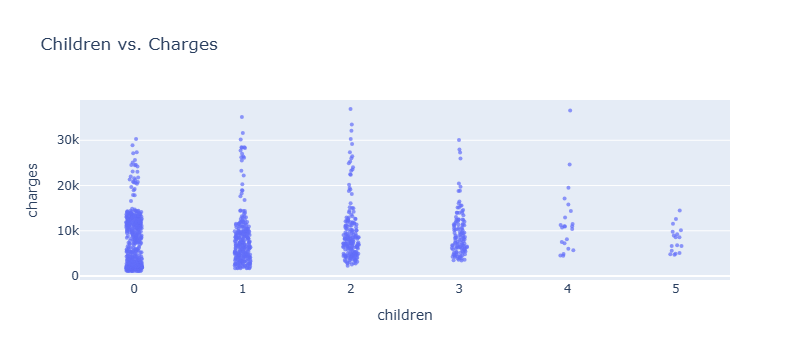

In [389]:
fig = px.strip(non_smoker_df, y = "charges", x = "children", title = "Children vs. Charges")
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

In [71]:
inputs, targets = non_smoker_df[["age", "bmi", "children"]], non_smoker_df["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 4608.470405038246


In [72]:
inputs, targets = medical_df[["age", "bmi", "children"]], medical_df["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 11355.317901125973


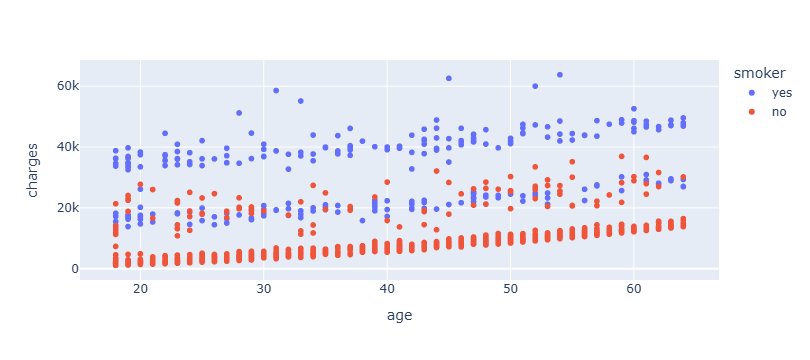

In [392]:
px.scatter(medical_df, x = "age", y = "charges", color = "smoker")

Use Categorical Feature to turn variables into number

<Axes: xlabel='smoker', ylabel='charges'>

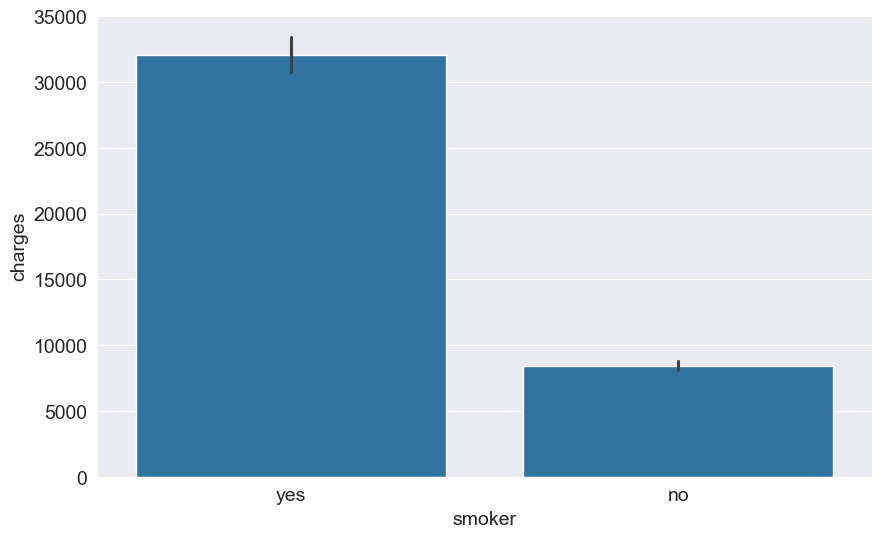

In [393]:
sns.barplot(medical_df, x = "smoker", y = "charges")

In [73]:
smoker_codes = {"no": 0, "yes": 1}
medical_df["smoker_codes"] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [74]:
medical_df.charges.corr(medical_df.smoker_codes)

np.float64(0.7872514304984778)

We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + b$

In [75]:
inputs, targets = medical_df[["age", "bmi", "children", "smoker_codes"]], medical_df["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

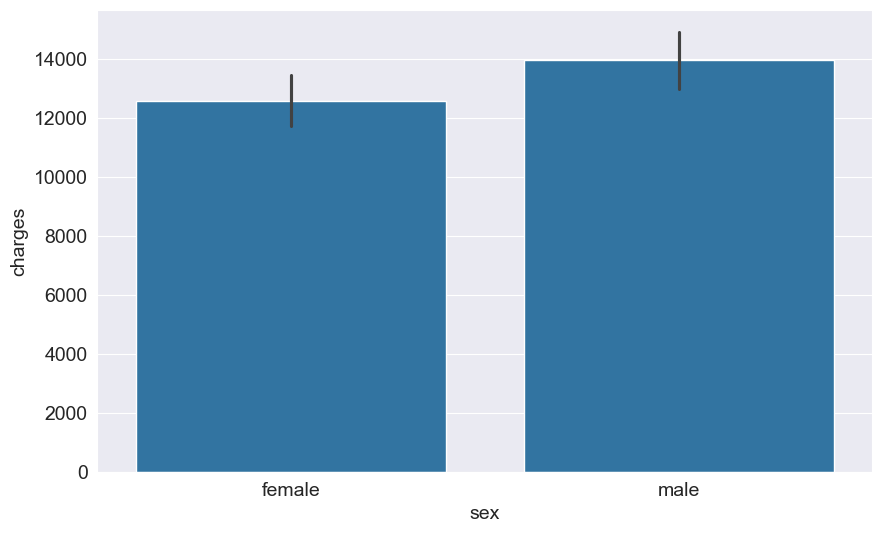

In [397]:
sns.barplot(medical_df, x = "sex", y = "charges")

In [76]:
sex_codes = {"female": 0, "male": 1}

In [77]:
medical_df["sex_codes"] = medical_df.sex.map(sex_codes)
#medical_df = medical_df.drop("sex_code", axis = 1)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [78]:
medical_df.charges.corr(medical_df.sex_codes)

np.float64(0.05729206220202533)

In [79]:
inputs, targets = medical_df[["age", "bmi", "children", "smoker_codes", "sex_codes"]], medical_df["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 6056.100708754546


.

One-hot Encoding

<Axes: xlabel='region', ylabel='charges'>

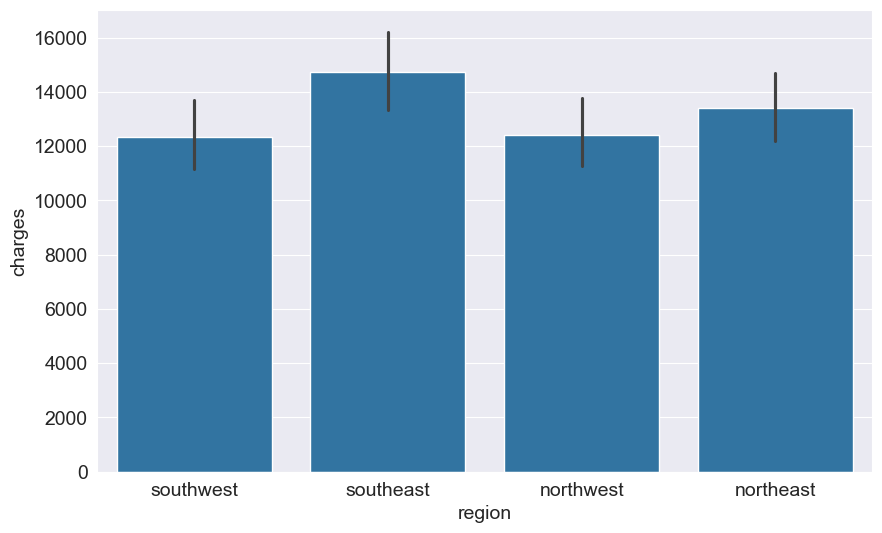

In [80]:
sns.barplot(medical_df, x = "region", y = "charges")

In [81]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [82]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [83]:
medical_df[["northeast", "northwest", "southeast", "southwest"]] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [84]:
input_columns = ["age", "bmi", "children", "smoker_codes", "sex_codes","northeast", "northwest", "southeast", "southwest"]
inputs, targets = medical_df[input_columns], medical_df["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 6041.6796511744515


Feature Scaling

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [85]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [86]:
model.intercept_

np.float64(-12525.54781119545)

In [87]:
weights_df = pd.DataFrame({"feature": np.append(input_columns, 1),
                          "weights": np.append(model.coef_, model.intercept_)})
weights_df

,feature,weights
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_codes,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
numeric_columns = ["age", "bmi", "children"]
scaler = StandardScaler()
scaler.fit(medical_df[numeric_columns])

,copy,True
,with_mean,True
,with_std,True


In [90]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [91]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [92]:
medical_df[numeric_columns]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [93]:
scaled_inputs = scaler.transform(medical_df[numeric_columns])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [94]:
categorical_columns = ["smoker_codes", "sex_codes","northeast", "northwest", "southeast", "southwest"]
categorical_data = medical_df[categorical_columns].values

In [95]:
inputs

,age,bmi,children,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [96]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 6041.679651174452


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [97]:
weights_df = pd.DataFrame({"feature": np.append(numeric_columns + categorical_columns, 1),
                          "weights": np.append(model.coef_, model.intercept_)})
weights_df.sort_values("weights", ascending = False)

,feature,weights
3,smoker_codes,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_codes,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [102]:
model.predict([[28,30,2,1,0,0,1,0,0.]])

array([196735.05510156])

In [103]:
scaler.transform([[28,30,2]])

C:\Users\JFADIPE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [104]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0.]])

array([29875.81463371])

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [107]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5530.612083645484


In [108]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6097.542904238116


### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.